<img src="https://i.imgur.com/CEb9pew.png">

## Table of contents

### 1. Introduction
* Problem description and dataset review.

### 2. Data import and quality check
* Libraries import and default configuration.
* Classes definition.
* Data load, cleaning and inspection.

### 3. Descriptive statistics and exporatory data analysis
* General overview and feature statistics.
* Feature outliers and target distribution.
* Correlation matrix and correlated features analysis.

### 4. Data processing
* Train/test split and normalization of the data.

### 5. Model development
* Model selection and tunning.
* Model validation.
* Feature importance and predictions.

In [1]:
__author__ = "Juan Vicente Peluso"
__email__ = "vpeluso@gmail.com"

### 1. Introduction

* **Problem description and dataset review.**

Breast cancer is the most common cancer among women in the world. It accounts for 25% of all cancer cases and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumours that can be seen via X-ray or felt as lumps in the breast area.

The key challenge against its detection is how to classify tumours into malignant (cancerous) or benign(non-cancerous). We'll accomplish the analysis of classifying these tumours using the Breast Cancer Wisconsin (Diagnostic) Dataset and applying classification machine learning algorithms.

The data is in a *.csv* file, contains 32 columns including the target value. The features are measurements of the breast:

* **id:** Unique ID.
* **radius_mean:** Radius of Lobes.
* **texture_mean:** Mean of Surface Texture.
* **perimeter_mean:** Outer Perimeter of Lobes.
* **area_mean:** Mean Area of Lobes.
* **smoothness_mean:** Mean of Smoothness Levels.
* **compactness_mean:** Mean of Compactness.
* **concavity_mean:** Mean of Concavity.
* **concave points_mean:** Mean of Cocave Points.
* **symmetry_mean:** Mean of Symmetry.
* **fractal_dimension_mean:** Mean of Fractal Dimension.
* **radius_se:** SE of Radius.
* **texture_se:** SE of Texture.
* **perimeter_se:** Perimeter of SE.
* **area_se:** Area of SE.
* **smoothness_se:** SE of Smoothness.
* **compactness_se:** SE of compactness.
* **concavity_se:** SEE of concavity.
* **concave points_se:** SE of concave points.
* **symmetry_se:** SE of symmetry.
* **fractal_dimension_se:** SE of Fractal Dimension.
* **radius_worst:** Worst Radius.
* **texture_worst:** Worst Texture.
* **perimeter_worst:** Worst Permimeter.
* **area_worst:** Worst Area.
* **smoothness_worst:** Worst Smoothness.
* **compactness_worst:** Worse Compactness.
* **concavity_worst:** Worst Concavity.
* **concave points_worst:** Worst Concave Points.
* **symmetry_worst:** Worst Symmetry.
* **fractal_dimension_worst:** Worst Fractal Dimension.

The target value is binary, and is the final result of the type of tumour:

* **diagnosis:** Target: M - Malignant B - Benign.

### 2. Data import and quality check

* **Libraries import and default configuration.**

In [2]:
# Ignore deprecation warnings in sklearn
import warnings
warnings.filterwarnings('ignore')

# Import libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as clr
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
%matplotlib inline

# Default configurations (Pandas and colors for the graphs)
rndSt = 16
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
CorrCmap = sns.diverging_palette(10, 240, as_cmap=True)
pieColors = ['skyblue','lightgreen']
scatColor = [['#0099ff','#002db3'], ['#1aff1a','#00b33c'],
             ['#ff8080','#ff0000'], ['#e066ff','#8600b3']]
plotColor = ['b','g','r','m','y', 'silver', 'cadetblue', 
             'yellowgreen', 'darksalmon']
print('Libraries imported and default configuration set!')

Libraries imported and default configuration set!


* **Classes definition.**

In [20]:
class plotMaster():
    
    def __init__(self):
        self.setStyle()

    def setStyle(self, style = 'white'):
        sns.set(style = style)
        
    def plotCorr(self, corr, title, figSize = [7,7], titleFS = 15, cmap = 'blues', annot = True, 
                square = True, fmt = '.1f', vMM = [-1,1], lineW = 0.25, cbarD = {}, rot = 90,
                annD = {}, ticksFS = 10, yLim = [0.0,0.0]):
        
        ''' Process that plot a correlation matrix '''

        mask = np.zeros_like(corr, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        f, ax = plt.subplots(figsize=(figSize))
        ax.set_title(title, fontdict={'fontsize': titleFS})
        sns.heatmap(corr, annot = annot, mask=mask, cmap=cmap, vmin=vMM[0], vmax=vMM[1],
                    center=0, fmt=fmt, annot_kws=annD, square=True, linewidths=lineW, 
                    cbar_kws=cbarD)
        plt.xticks(fontsize = ticksFS, rotation = rot, ha = 'right')
        plt.yticks(fontsize = ticksFS)
        plt.title(title, fontsize = titleFS)
        b,t = plt.ylim()
        plt.ylim(bottom=(b*yLim[0]), top = (t*yLim[1]))
        
    def plotKDE(self, fig, title, kde, featureD, labels, 
                colors = ['b', 'g'], legLoc = 0, legFS = 12, titleFS = 15):
        
        ax=sns.kdeplot(kde[0], color=colors[0], shade=True, label= labels[0])
        ax=sns.kdeplot(kde[1], color=colors[1], shade=True, label= labels[1])
        plt.title('{} {}'.format(featureD, title), fontsize = titleFS)
        plt.tick_params(top=False, bottom=True, left=True, right=False)
        if legLoc == 0 :
            plt.legend(frameon=False, loc = legLoc, fontsize = legFS)
        else :    
            plt.legend(frameon=False, bbox_to_anchor=(legLoc), fontsize = legFS)
        ax.set_ylabel('')
        plt.xlabel(featureD, fontsize = 9)
        plt.xticks(fontsize = 8)
        plt.yticks(fontsize = 8)
        plt.tight_layout()
        
    def plotScat(self, df, X, y, colHue, colStyle, palette, fig, markers, legLbl, legFS = 8,
                 legLoc = 1, s = 25, yLblCo = [-0.105, 0.5], lblFS = 12, titleFS = 13):
    
        sctPlot = sns.scatterplot(df[X], df[y], hue = df[colHue],  style = df[colStyle],
                                  palette = palette, markers=markers, s = s)
        sctTitle = X +' vs. ' + y
        sctPlot.yaxis.set_label_coords(yLblCo[0], yLblCo[1])
        plt.xlabel(X, fontsize = lblFS)
        plt.ylabel(y, fontsize = lblFS)
        sctPlot.set_title(sctTitle, fontsize = titleFS, y = 0.905, fontweight = 548)
        plt.tick_params(top=False, bottom=True, left=True, right=False)
        plt.legend(loc=legLoc, fontsize = legFS) 
        legend = sctPlot.legend_
        for i, label in enumerate(legLbl):
            legend.get_texts()[i].set_text(label) 

    def plotCM(y_test, y_pred, target_names, title='Confusion matrix', cmap=None, 
               figSize = [8,6], x_rot = 45, normalize=True):
    
        """ given a sklearn confusion matrix (cm), make a nice plot

        Arguments
        ---------
        cm:           confusion matrix from sklearn.metrics.confusion_matrix
        target_names: given classification classes such as [0, 1, 2], the class names, for example: ['high', 'medium', 'low']
        title:        the text to display at the top of the matrix
        cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
        figSize:      Size of the confusion matrix plot (*)
        x_rot:        Degree of rotation of the X-axis labels (*)
        normalize:    If False, plot the raw numbers, If True, plot the proportions """
        
        cm = confusion_matrix(y_test, y_pred)
        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('Blues')

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        fig = plt.figure(figsize=(figSize))
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm, cmap=cmap)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + target_names)
        ax.set_yticklabels([''] + target_names)
        plt.tick_params(axis='both', which='major', length=0)
        plt.xlabel('Predicted')
        plt.ylabel('True')

        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontweight = 'demibold')
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black",
                         fontweight = 'demibold')


        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
        plt.show()

* **Data load, cleaning and inspection.**

In [4]:
# Import the dataset into a pandas dataframe
df = pd.read_csv('myData/breast-cancer.csv')
print('Data imported!\n')

# See the main stats of the data
print('Dataframe information\n---------------------')
print('{}\n'.format(df.info()))

# See the number of rows and columns
print('Dataframe shape\n---------------')
print('{}\n'.format(df.shape))

# Check if there're nan values and if there are, delete the rows
nan = np.sum(df.isna().sum())
print('NaN values\n----------')
if nan > 0:
    df.dropna()
    print('{} rows with NaN values\nNaN rows successfully deleted\n'.format(nan))
else: 
    print('{} rows with NaN values\n'.format(nan))

Data imported!

Dataframe information
---------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se          

### 3. Descriptive statistics and exporatory data analysis

* **General overview and features statistics**

In [5]:
# Check the first rows of the dataframe
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# Check the general statistics of the numerical columns of the dataset 
df = df.drop(['id'], axis = 1)
df.describe(include='all')

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


* **Feature outliers and target distribution.**

In [7]:
# Let's check for outliers

lstResults = []
lstColumns = ['Feature', 'Lower outliers', 'Upper outliers', 'Lower outliers pct', 
              'Upper outliers pct']
tmpDF = df.describe()
for feature in list(tmpDF.columns)[1:]:
    IQR = [tmpDF.loc['25%', feature], tmpDF.loc['75%', feature]]
    lowCount = df[df[feature] < ((IQR[0] - (IQR[1]-IQR[0])*1.5))].count()[0]
    highCount = df[df[feature] > ((IQR[1] + (IQR[1]-IQR[0])*1.5))].count()[0]
    lowPerc = (lowCount/df.shape[0])*100
    highPerc = (highCount/df.shape[0])*100
    lstResults.append([feature, lowCount, highCount, lowPerc, highPerc])
dfOutliers = pd.DataFrame(lstResults, columns = lstColumns).set_index('Feature')

dfOutliers

,Lower outliers,Upper outliers,Lower outliers pct,Upper outliers pct
Feature,,,,
texture_mean,0,7,0.000000,1.230228
perimeter_mean,0,13,0.000000,2.284710
area_mean,0,25,0.000000,4.393673
smoothness_mean,1,5,0.175747,0.878735
compactness_mean,0,16,0.000000,2.811951
concavity_mean,0,18,0.000000,3.163445
concave points_mean,0,10,0.000000,1.757469
symmetry_mean,1,14,0.175747,2.460457
fractal_dimension_mean,0,15,0.000000,2.636204


We can see that only one feature *(area_se)* has more than 10% of outliers. Three features with one lower range outliers _(0.5%)_, a mean of **20** upper range outliers *(3.5%)* on all columns, and finally, only one feature doesn't have extreme values _(concave points_worst)_. We consider that there's no need to handle the present outliers.

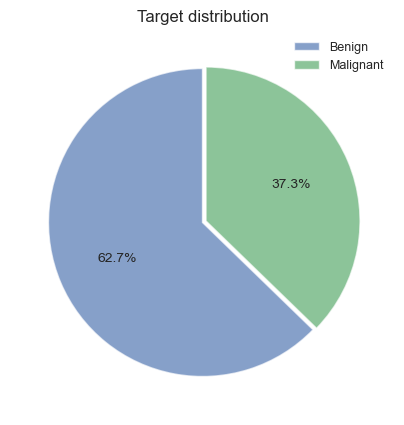

In [21]:
# Draw a pie chart to see the distribution of the target column "Diagnosis"
pg = plotMaster()
df.groupby('diagnosis').count().iloc[:,0].plot(kind='pie', startangle = 90, textprops={'size': 10},
                                           autopct='%1.1f%%', figsize=(5,5), colors = ['b','g'],
                                           explode = (0, 0.025), labels = ['',''], wedgeprops={'alpha' : 0.675})
plt.axis('off')
plt.legend(['Benign','Malignant'],loc=1, frameon=False, fontsize = 9)
plt.title('Target distribution', fontsize = 12)
plt.show()

The target feature _**Diagnosis**_ is distributed on almost 2/3 of the cases tagged as _Benign_, which means that only 1 of every 3 cases is _malignant_.

* **Correlation matrix and correlated features analysis.**

Let's see which features are most closely correlated with the diagnosis value, to see which features can tell us more about how to identify and classify the tumours. We'll select the top-15 and see the mean and STD for benign and malignant tumours those features have.

In [9]:
# Encode categorical features using scikit-learn LabelEncoder, and select the top-15 features correlated to diagnosis 
encoder = LabelEncoder()
df['diagnosis'] = encoder.fit_transform(df['diagnosis'])
corrDF = df.corr()['diagnosis'].sort_values(ascending=False).to_frame().reset_index()[:16]
corrDF = corrDF.rename(columns={'index': 'Feature', 'diagnosis': 'Correlation'})
corrDF[1:16]

,Feature,Correlation
1,concave points_worst,0.793566
2,perimeter_worst,0.782914
3,concave points_mean,0.776614
4,radius_worst,0.776454
5,perimeter_mean,0.742636
6,area_worst,0.733825
7,radius_mean,0.730029
8,area_mean,0.708984
9,concavity_mean,0.696360
10,concavity_worst,0.659610


In [10]:
summaryDF = df[corrDF['Feature']].groupby('diagnosis')
summaryDF.mean()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
diagnosis,,,,,,,,,,,,,,,
0,0.074444,87.005938,0.025717,13.379801,78.075406,558.899440,12.146524,462.790196,0.046058,0.166238,0.080085,0.182673,0.284082,2.000321,21.135148
1,0.182237,141.370330,0.087990,21.134811,115.365377,1422.286321,17.462830,978.376415,0.160775,0.450606,0.145188,0.374824,0.609083,4.323929,72.672406


In [11]:
summaryDF = df[corrDF['Feature']].groupby('diagnosis')
summaryDF.std()

,concave points_worst,perimeter_worst,concave points_mean,radius_worst,perimeter_mean,area_worst,radius_mean,area_mean,concavity_mean,concavity_worst,compactness_mean,compactness_worst,radius_se,perimeter_se,area_se
diagnosis,,,,,,,,,,,,,,,
0,0.035797,13.527091,0.015909,1.981368,11.807438,163.601424,1.780512,134.287118,0.043442,0.140368,0.033750,0.092180,0.112570,0.771169,8.843472
1,0.046308,29.457055,0.034374,4.283569,21.854653,597.967743,3.203971,367.937978,0.075019,0.181507,0.053987,0.170372,0.345039,2.568546,61.355268


Now, let's see the *correlation matrix* among the top-15 correlated features, see the distribution of the top-5 in a *kernel density estimate* plot, and finally draw a *scatter* graph to see if there are some clusters or trends.

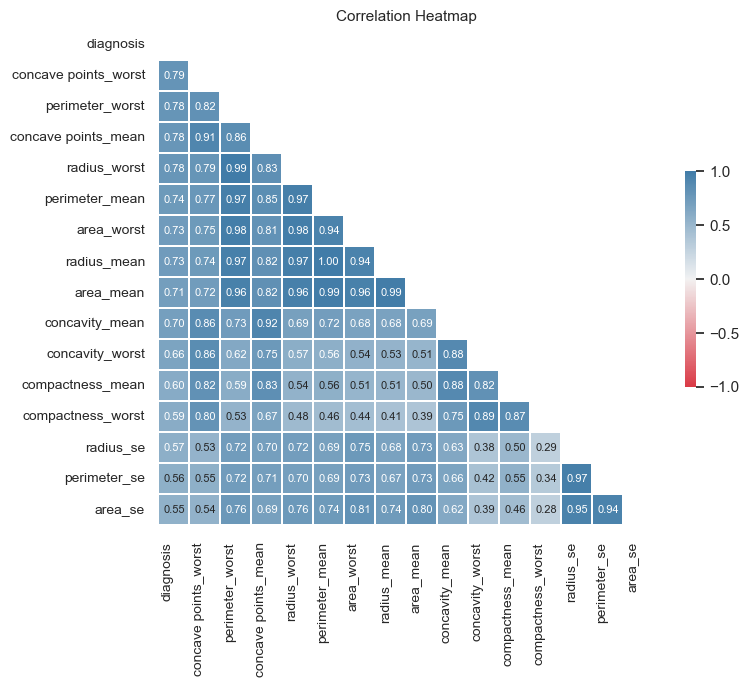

In [12]:
# Plot correlation matrix among the top features
pg.plotCorr(df[corrDF['Feature']].corr(), 'Correlation Heatmap', figSize = [8,8], titleFS = 11,
            cmap = CorrCmap, lineW = 0.3, cbarD = {"shrink": .35, "ticks":[-1, -0.5, 0, 0.5,1]},
            annD = {'size': 8}, yLim = [1.0075,0.0], fmt = '.2f')
plt.show()

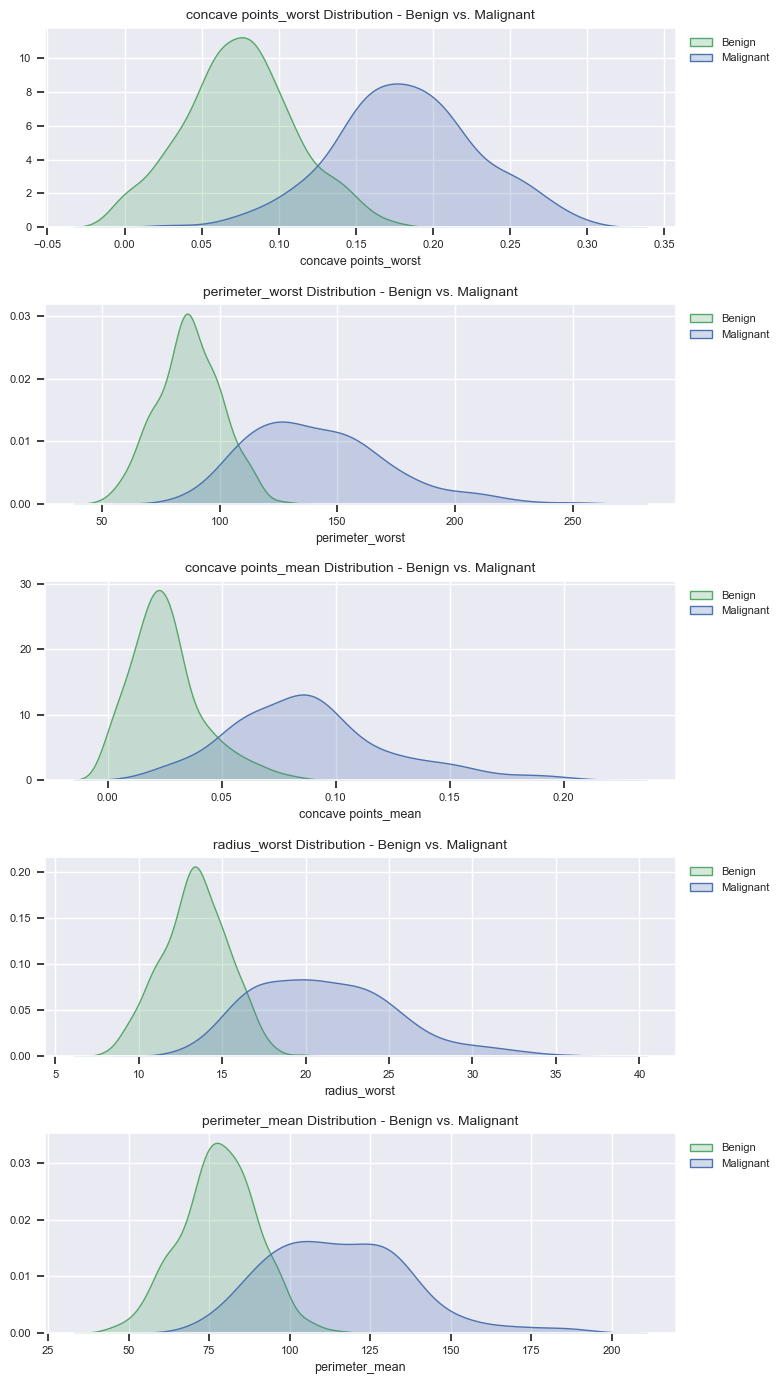

In [13]:
# Create figure and data, call plot KDE function
fig1 = plt.figure(figsize=(8,14))
pg.setStyle('darkgrid')
lstLbl = ['Benign', 'Malignant']
lstKDE = corrDF['Feature'][1:6].to_list()
for i in range(len(lstKDE)):
    pg.plotKDE(fig1.add_subplot(5,1,i+1), 'Distribution - Benign vs. Malignant',
               [df.loc[(df['diagnosis'] == 0), lstKDE[i]],
                df.loc[(df['diagnosis'] == 1), lstKDE[i]]], lstKDE[i],
               lstLbl, colors = [plotColor[1], plotColor[0]], legLoc = [1.165,1],
               legFS = 8, titleFS = 10)
plt.show()

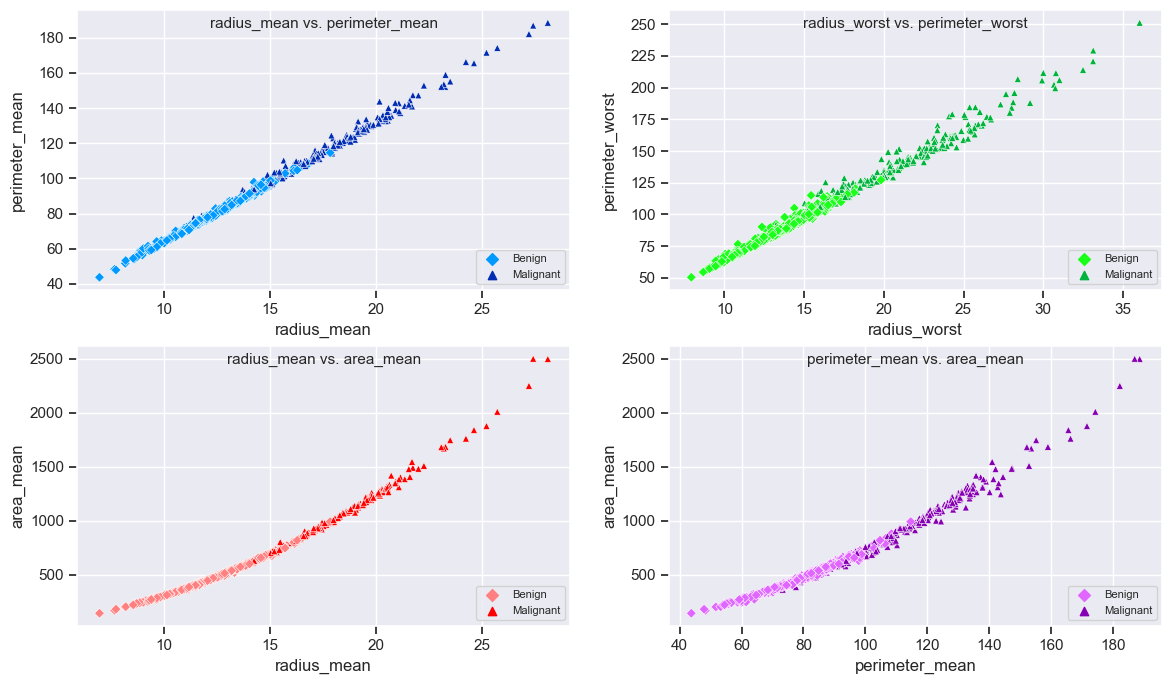

In [14]:
# Create the lists and dicts, and call plot scatter function
colX = ['radius_mean', 'radius_worst', 'radius_mean', 'perimeter_mean']
colY = ['perimeter_mean', 'perimeter_worst', 'area_mean', 'area_mean']
lstLegLbl = ['Benign', 'Malignant']
markers = {0: 'D', 1 : '^'}
fig1 = plt.figure(figsize=(14,8))
for i in range(len(colX)):
    pg.plotScat(df, colX[i], colY[i], 'diagnosis', 'diagnosis', scatColor[i], 
                fig1.add_subplot(2,2,i+1), markers, lstLegLbl, legLoc = 4, titleFS = 11)

As we can see, there are density and trends clearly noticeable in both KDE and scatter plots. Let's move on the data processing and model development phases.

### 4. Data processing

* **Train/test split and normalization of the data**

Now, it's time to prepare the data for the algorithms, first, we'll separate the data on features _(X)_ and target _(y)_, to then split them into train and test sets, 70% to train the machine learning algorithms and 30% to test their accuracy. Finally, standardize the data using the _StandardScaler_ scikit-learn package to ensure the features are on the same scale.

In [15]:
lstFeatures = corrDF[1:16]['Feature'].tolist()
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 13, stratify = y)
print('Data splitted in train and test datasets')
print('====================================')
print('Full dataset shape   --> ', df.shape)
print('Train features shape --> ', X_train.shape)
print('Test features shape  --> ', X_test.shape)
print('Train target shape   --> ', y_train.shape)
print('Test target shape    --> ', y_test.shape,)
print('====================================')

Data splitted in train and test datasets
Full dataset shape   -->  (569, 31)
Train features shape -->  (398, 30)
Test features shape  -->  (171, 30)
Train target shape   -->  (398,)
Test target shape    -->  (171,)


In [16]:
scaler = StandardScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), index = X_train.index)
X_test_sc = pd.DataFrame(scaler.transform(X_test), index = X_test.index)
print('Data standardized')

Data standardized


### 5. Model development

* **Model selection and baselines.**

We've selected 3 different machine learning algorithms to try to predict if a tumour is benign or malignant:

1. Logistic regression.
2. Random Forest Classifier.

We'll use a _**RandomizedSearchCV**_ to evaluate the models with combinations of parameters and, depending on the results, we'll decide if we go further tunning the model, or just keep the best finding. Let's begin.

In [17]:
######### Logistic regression #########

# Hyperparameters list
lstLR_C = [0.1, 0.25, 0.5, 1, 1.5, 2, 3, 5]

# Create the parameter grid
param_gridLR = {'C' : lstLR_C}

# Create a random search object
randomLR_class = RandomizedSearchCV(estimator = LogisticRegression(),
                                    param_distributions = param_gridLR, n_iter = 100,
                                    scoring='accuracy', cv = 4, return_train_score= True)



# Fit to the training data
randomLR_class.fit(X_train_sc, y_train)

# Get top-5 results and print them
dfLR = pd.DataFrame(randomLR_class.cv_results_)
dfLR = dfLR.sort_values(by=['rank_test_score']).head(5)

print('Top 5 results (Logistic Regression)\n')
for index, row in dfLR.iterrows():
        print('Accuracy score (test): {:.8f} - Parameters: C --> {}'.format(row['mean_test_score'], 
                                                                                 row['param_C'])) 
        

Top 5 results (Logistic Regression)

Accuracy score (test): 0.97984848 - Parameters: C --> 0.5
Accuracy score (test): 0.97734848 - Parameters: C --> 0.1
Accuracy score (test): 0.97734848 - Parameters: C --> 0.25
Accuracy score (test): 0.97734848 - Parameters: C --> 1
Accuracy score (test): 0.97734848 - Parameters: C --> 1.5


In [18]:
######### Random forest #########

# Hyperparameters lists
lstRF_Crit = ['gini', 'entropy'] # Random Forest --> Criterion
lstRF_MF = ['auto', 'log2', None] # Random Forest --> max_feature
lstRF_MD = np.arange(3,25) # Random Forest --> max_depth

# Create the parameter grid
param_gridRF = {'max_depth' : lstRF_MF, 
                'max_features' : lstRF_MD, 
                'criterion' : lstRF_Crit} 

# Create a random search object
randomRF_class = RandomizedSearchCV(estimator = RandomForestClassifier(n_estimators=100, 
                                                                       random_state = 13),
                                    param_distributions = param_gridRF, n_iter = 100,
                                    scoring='accuracy', cv = 4, return_train_score= True)

# Fit to the training data
randomRF_class.fit(X_train_sc, y_train)

# Get top-5 results and print them
dfRF = pd.DataFrame(randomRF_class.cv_results_)
dfRF = dfRF.sort_values(by=['rank_test_score']).head(5)

print('Top 5 results (Random Forest)\n')
for index, row in dfRF.iterrows():
        print('Accuracy score (test): {:.8f} - Parameters: criterion    --> {}'.format(row['mean_test_score'], 
                                                                                       row['param_criterion'])) 
        print('                                                max_features --> {}'.format(row['param_max_features']))
        print('                                                max_depth    --> {}'.format(row['param_max_depth']))

Top 5 results (Random Forest)

Accuracy score (test): 0.96227273 - Parameters: criterion    --> entropy
                                                max_features --> 13
                                                max_depth    --> None
Accuracy score (test): 0.96227273 - Parameters: criterion    --> entropy
                                                max_features --> 3
                                                max_depth    --> None
Accuracy score (test): 0.95977273 - Parameters: criterion    --> entropy
                                                max_features --> 10
                                                max_depth    --> None
Accuracy score (test): 0.95977273 - Parameters: criterion    --> entropy
                                                max_features --> 8
                                                max_depth    --> None
Accuracy score (test): 0.95977273 - Parameters: criterion    --> entropy
                                                max_fe

bla bla la

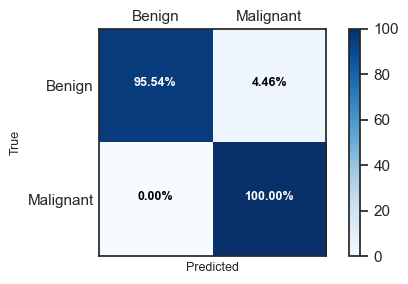

Accuracy score  --> 0.97076023
Precision score --> 1.00000000
Recall score    --> 0.92187500
F1 score        --> 0.95934959
Log Loss error  --> 1.00990574


In [40]:
# Create the classifier
classLR = LogisticRegression(C = randomLR_class.best_params_['C'])

# Fit and predict
classLR.fit(X_train_sc, y_train)
classLR_Pred = classLR.predict(X_test_sc)
classLR_PP = classLR.predict_proba(X_test_sc)[:,1]

# Create and plot the confusion matrix
cm = confusion_matrix(classLR_Pred, y_test)
accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

fig = plt.figure(figsize=([5,3]))
cmap = plt.get_cmap('Blues')
cm = (cm.astype('float')*100) / cm.sum(axis=1)[:, np.newaxis]

ax = fig.add_subplot(111)
cax = ax.matshow(cm, cmap=cmap)
fig.colorbar(cax, ticks=np.arange(0,101,20))
ax.set_xticklabels([''] + ['Benign','Malignant'])
ax.set_yticklabels([''] + ['Benign','Malignant'])
plt.tick_params(axis='both', which='major', length=0)
plt.ylabel('True', fontsize = 9)
plt.xlabel('Predicted', fontsize = 9)
thresh = cm.max() / 1.5
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, "{:0.2f}%".format(cm[i, j]),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black",
             fontweight = 568, fontsize = 9)
plt.tight_layout()
plt.show()
#ax.xaxis.set_label_coords(0.5, -0.075)

# Compute and print the scores and metrics
print('Accuracy score  --> {:.8f}'.format(accuracy_score(y_test, classLR_Pred)))
print('Precision score --> {:.8f}'.format(precision_score(y_test, classLR_Pred)))
print('Recall score    --> {:.8f}'.format(recall_score(y_test, classLR_Pred)))
print('F1 score        --> {:.8f}'.format(f1_score(y_test, classLR_Pred)))
print('Log Loss error  --> {:.8f}'.format(log_loss(y_test, classLR_Pred)))

In [26]:
cm = confusion_matrix(y_test, classLR_Pred)
cm

array([[107,   0],
       [  5,  59]], dtype=int64)

In [30]:
import itertools